<a href="https://colab.research.google.com/github/chongzicbo/Dive-into-Deep-Learning-tf.keras/blob/master/3_5_%E5%9B%BE%E5%83%8F%E5%88%86%E7%B1%BB%E6%95%B0%E6%8D%AE%E9%9B%86(Fashion_Mnist).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##3.5. 图像分类数据集（Fashion-MNIST）
&emsp;&emsp;在介绍softmax回归的实现前我们先引入一个多类图像分类数据集。它将在后面的章节中被多次使用，以方便我们观察比较算法之间在模型精度和计算效率上的区别。图像分类数据集中最常用的是手写数字识别数据集MNIST [1]。但大部分模型在MNIST上的分类精度都超过了95%。为了更直观地观察算法之间的差异，我们将使用一个图像内容更加复杂的数据集Fashion-MNIST [2]。

### 3.5.1. 获取数据集
&emsp;&emsp;首先导入本节需要的包或模块。

In [1]:
%matplotlib inline
import tensorflow as tf
from tensorflow.keras import datasets
import sys
import time
import matplotlib.pyplot as plt
from IPython import display
import tensorflow.data as tfdata

In [0]:
tf.enable_eager_execution()

&emsp;&emsp;下面，我们通过keras的dataset包来下载这个数据集。第一次调用时会自动从网上获取数据。返回训练数据集和测试数据集（testing data set）。测试数据集也叫测试集（testing set），只用来评价模型的表现，并不用来训练模型。

In [3]:
(x_train,y_train),(x_test,y_test)=datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


&emsp;&emsp;训练集中和测试集中的每个类别的图像数分别为6,000和1,000。因为有10个类别，所以训练集和测试集的样本数分别为60,000和10,000。

In [4]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [0]:
feature,label=x_train[0],y_train[0]

&emsp;&emsp;变量feature对应高和宽均为28像素的图像。每个像素的数值为0到255之间8位无符号整数（uint8）。它使用三维的Tensor存储。其中的最后一维是通道数。因为数据集中是灰度图像，所以通道数为1。为了表述简洁，我们将高和宽分别为 h 和 w 像素的图像的形状记为 h×w 或（h，w）。

In [8]:
feature.shape,feature.dtype

((28, 28), dtype('uint8'))

In [9]:
label,type(label),label.dtype

(9, numpy.uint8, dtype('uint8'))

&emsp;&emsp;Fashion-MNIST中一共包括了10个类别，分别为t-shirt（T恤）、trouser（裤子）、pullover（套衫）、dress（连衣裙）、coat（外套）、sandal（凉鞋）、shirt（衬衫）、sneaker（运动鞋）、bag（包）和ankle boot（短靴）。以下函数可以将数值标签转成相应的文本标签。

In [0]:
def get_fashion_mnist_labels(labels):
  text_labels=['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
  return [text_labels[int(i)]  for i in labels]                   

现在，我们看一下训练数据集中前9个样本的图像内容和文本标签。

In [0]:
def use_svg_display():
  #用矢量图显示
  display.set_matplotlib_formats('svg')
def set_figsize(figsize=(3.5,2.5)):
  use_svg_display()
  #设置图的尺寸
  plt.rcParams['figure.figsize']=figsize

def show_fashion_mnist(images,labels):
  use_svg_display()
  _,figs=plt.subplots(1,len(images),figsize=(12,12))
  for f,img,lbl in zip(figs,images,labels):
    f.imshow(img.reshape((28,28)))
    f.set_title(lbl)
    f.axes.get_xaxis().set_visible(False)
    f.axes.get_yaxis().set_visible(False)


In [0]:
X,y=x_train[0:9],y_train[0:9]

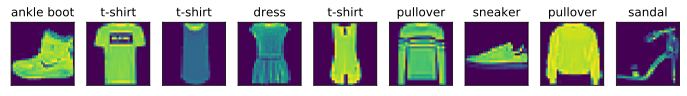

In [13]:
show_fashion_mnist(X,get_fashion_mnist_labels(y))

###3.5.2. 读取小批量
&emsp;&emsp;我们将在训练数据集上训练模型，并将训练好的模型在测试数据集上评价模型的表现。虽然我们可以像“线性回归的从零开始实现”一节中那样通过yield来定义读取小批量数据样本的函数，但为了代码简洁，这里我们直接通过from_tensor_slices创建Dataset实例。该实例每次读取一个样本数为batch_size的小批量数据。这里的批量大小batch_size是一个超参数。

In [0]:
batch_size=256
buffer_size=10000
train_iter=tfdata.Dataset.from_tensor_slices((x_train,y_train)).map(lambda x,y:(x/255,y)).shuffle(buffer_size).batch(batch_size)
test_iter=tfdata.Dataset.from_tensor_slices((x_test,y_test)).map(lambda x,y:(x/255,y)).batch(batch_size)

In [0]:
for x,y in iter(train_iter):
  print(x[0])
  print(y)
  break

In [16]:
start=time.time()
for X,y in train_iter:
  continue

'%.2f sec'%(time.time()-start)

'3.75 sec'

In [17]:
type(train_iter)

tensorflow.python.data.ops.dataset_ops.DatasetV1Adapter

### 3.5.3. 小结
&emsp;&emsp;Fashion-MNIST是一个10类服饰分类数据集，之后章节里将使用它来检验不同算法的表现。
我们将高和宽分别为 h 和 w 像素的图像的形状记为 h×w 或（h，w）。